In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
file_path = "PA-F_data-2.txt"  # Replace with the full path to your file
data = pd.read_csv(file_path, delimiter=r'\s+', header=None, comment='#')

In [3]:
# Separate features and labels
X = data.iloc[:, :4].values
y = data.iloc[:, 4].values

# Normalize the features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Encode labels to one-hot format
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y.reshape(-1, 1))

# Split the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_encoded, test_size=0.2, random_state=42)

# Define the neural network model
model = Sequential([
    Dense(8, activation='relu', input_shape=(4,)),  # Hidden layer with 8 neurons
    Dense(8, activation='relu'),                    # Another hidden layer with 8 neurons
    Dense(3, activation='softmax')                 # Output layer for 3 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

C:\Users\pyaas\.pyenv\pyenv-win\versions\3.9.13\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=16, verbose=1)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.6544 - loss: 1.0115 - val_accuracy: 0.7000 - val_loss: 0.9921
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6688 - loss: 0.9886 - val_accuracy: 0.7333 - val_loss: 0.9675
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7585 - loss: 0.9360 - val_accuracy: 0.8000 - val_loss: 0.9426
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7820 - loss: 0.9286 - val_accuracy: 0.8667 - val_loss: 0.9188
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8162 - loss: 0.9037 - val_accuracy: 0.9000 - val_loss: 0.8962
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8711 - loss: 0.8720 - val_accuracy: 0.9000 - val_loss: 0.8742
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8784 - loss: 0.8579 - val_accuracy: 0.9000 - val_loss: 0.8513
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8314 - loss: 0.8255 - val_accuracy: 0.9000 - val_loss:

In [5]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

Test Loss: 0.08082787692546844
Test Accuracy: 1.0


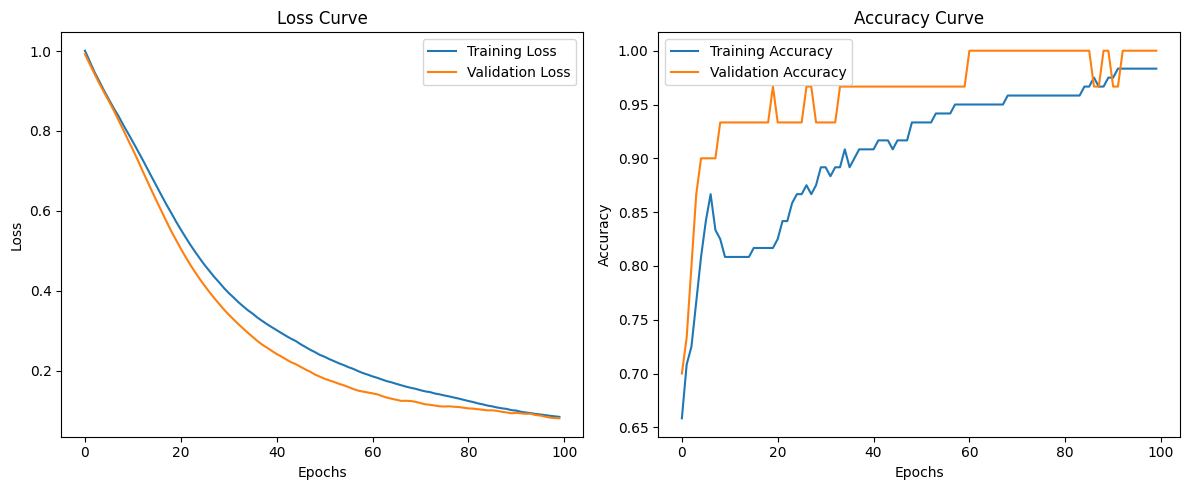

In [6]:
# Plot learning curves
plt.figure(figsize=(12, 5))

# Loss curve
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()

# Accuracy curve
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()

plt.tight_layout()
plt.show()

In [12]:
# Predictions on the training data
y_train_pred = model.predict(X_train)
y_train_pred_classes = np.argmax(y_train_pred, axis=1)
y_train_true_classes = np.argmax(y_train, axis=1)

# Training set misclassifications
train_correct = np.sum(y_train_pred_classes == y_train_true_classes)
train_misclassified = len(y_train_true_classes) - train_correct

# Predictions on the test data
y_test_pred = model.predict(X_test)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)
y_test_true_classes = np.argmax(y_test, axis=1)

# Test set misclassifications
test_correct = np.sum(y_test_pred_classes == y_test_true_classes)
test_misclassified = len(y_test_true_classes) - test_correct

print(f"Training set: {train_correct} correctly classified, {train_misclassified} misclassified.")
print(f"Testing set: {test_correct} correctly classified, {test_misclassified} misclassified.")

# Misclassified points in the training set
train_misclassified_indices = np.where(y_train_pred_classes != y_train_true_classes)[0]
print("Training Misclassified Indices:", train_misclassified_indices)

# Misclassified points in the testing set
test_misclassified_indices = np.where(y_test_pred_classes != y_test_true_classes)[0]
print("Testing Misclassified Indices:", test_misclassified_indices)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Training set: 118 correctly classified, 2 misclassified.
Testing set: 30 correctly classified, 0 misclassified.
Training Misclassified Indices: [59 62]
Testing Misclassified Indices: []
